## Problem 1

1. This problem involves hyperplanes in two dimensions.
(a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
points for which 1 + 3X1 − X2 > 0, as well as the set of points
for which 1 + 3X1 − X2 < 0.
(b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
Indicate the set of points for which −2 + X1 + 2X2 > 0, as well
as the set of points for which −2 + X1 + 2X2 < 0.

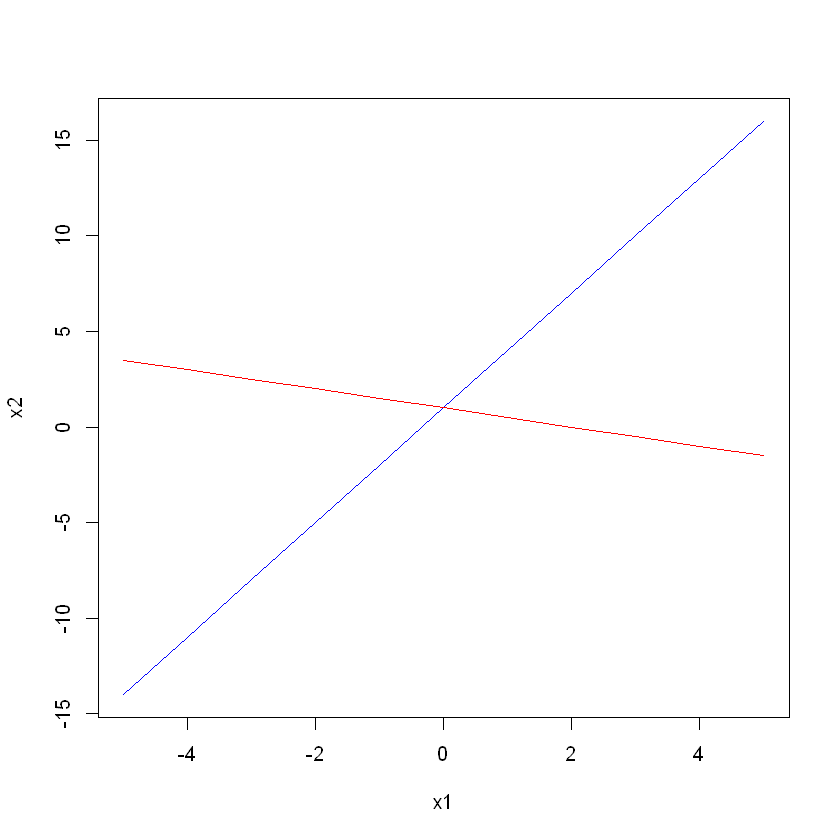

In [265]:
x1=-5:5
x2=3*x1+1
plot(x1, x2, col='blue', type='l')
x2=(2-x1)/2
lines(x1, x2, col='red', type='l')

1 + 3X1 − X2 > 0 is below blue line 

−2 + X1 + 2X2 > 0 is at top part above red line


In [259]:
#install.packages("e1071", repos='http://cran.us.r-project.org')
library(e1071)
library(ISLR)

In [90]:
predictions=function(y_probs, y, l1, l2, length, threshold=0.5){
    y_pred = rep(l1, length)
    y_pred[y_probs>threshold]=l2
return(y_pred)
}
class_error = function(cm){
    
    return((cm[2]+cm[3])/sum(cm))
}

## Problem 4

Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.


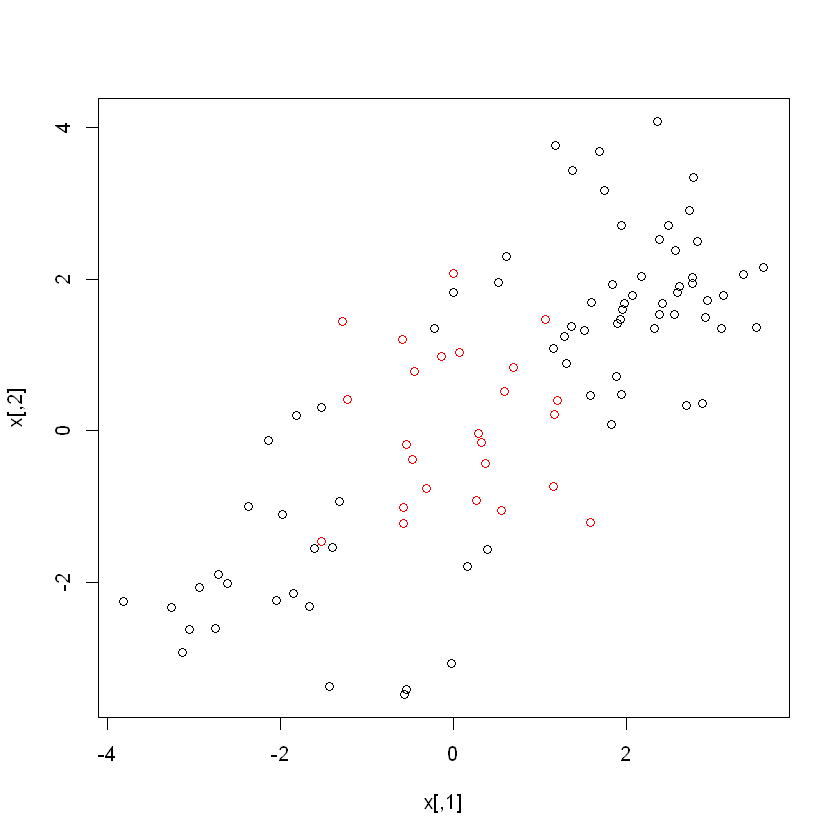

In [91]:
set.seed(1)
x=matrix(rnorm (100*2) , ncol=2)
x[1:50,]=x[1:50,]+2
x[51:75 ,]=x[51:75,]-2
y=c(rep(1,75) ,rep(2,25))
dat=data.frame(x=x,y=as.factor(y))
plot(x, col=y)

             x.1         x.2 y
1    1.373546189  1.37963332 1
2    2.183643324  2.04211587 1
3    1.164371388  1.08907835 1
4    3.595280802  2.15802877 1
5    2.329507772  1.34541536 1
6    1.179531616  3.76728727 1
7    2.487429052  2.71670748 1
8    2.738324705  2.91017423 1
9    2.575781352  2.38418536 1
10   1.694611613  3.68217608 1
11   3.511781168  1.36426355 1
12   2.389843236  1.53835527 1
13   1.378759419  3.43228224 1
14  -0.214699887  1.34930365 1
15   3.124930918  1.79261926 1
16   1.955066391  1.60719207 1
17   1.983809737  1.68000713 1
18   2.943836211  1.72088670 1
19   2.821221195  2.49418833 1
20   2.593901321  1.82266952 1
21   2.918977372  1.49404254 1
22   2.782136301  3.34303883 1
23   2.074564983  1.78542059 1
24   0.010648304  1.82044347 1
25   2.619825748  1.89980926 1
26   1.943871260  2.71266631 1
27   1.844204493  1.92643560 1
28   0.529247616  1.96236583 1
29   1.521849945  1.31833952 1
30   2.417941560  1.67572973 1
31   3.358679552  2.06016044 1
32   1.8

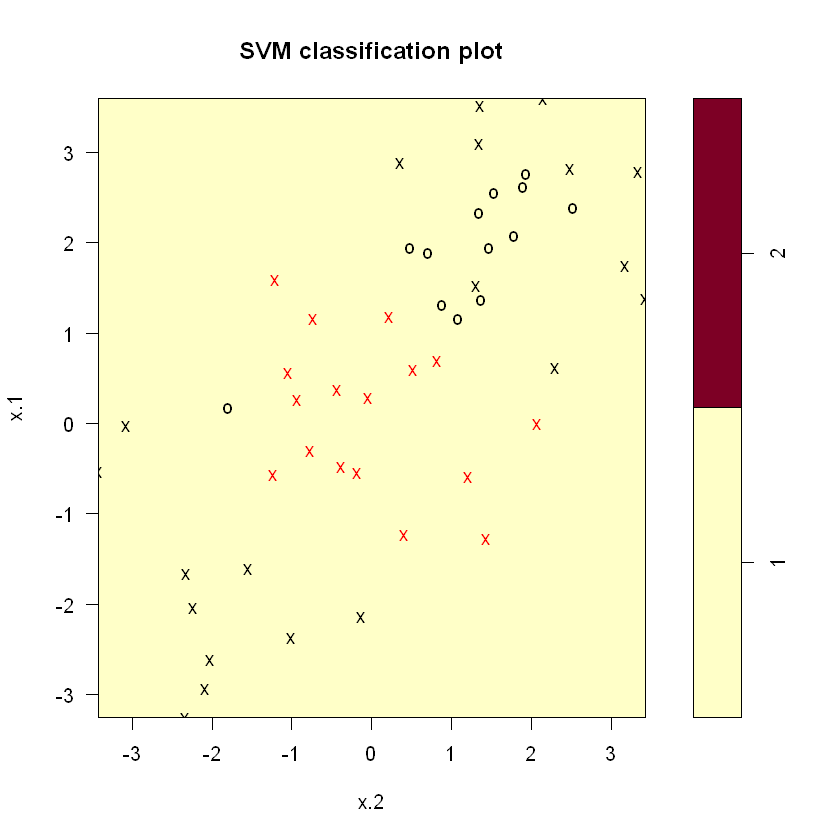

In [92]:
train=sample (100,50)
svmfit.lin=svm(y∼., data=dat[train,] , kernel ="linear", cost=1,
scale=FALSE)
plot(svmfit.lin , dat[train ,])
print(dat)

In [93]:
cm=table(predict = svmfit.lin$fitted, truth = dat[train,]$y)
cm

       truth
predict  1  2
      1 33 17
      2  0  0

In [94]:
errortrain.lin=class_error(cm)
errortrain.lin

[1] 0.34

In [95]:
lin.pred <- predict(svmfit.lin, dat[-train,])
cm=table(predict = lin.pred, truth = dat[-train,]$y)
cm

       truth
predict  1  2
      1 42  8
      2  0  0

In [96]:
errortest.lin=class_error(cm)
errortest.lin

[1] 0.16

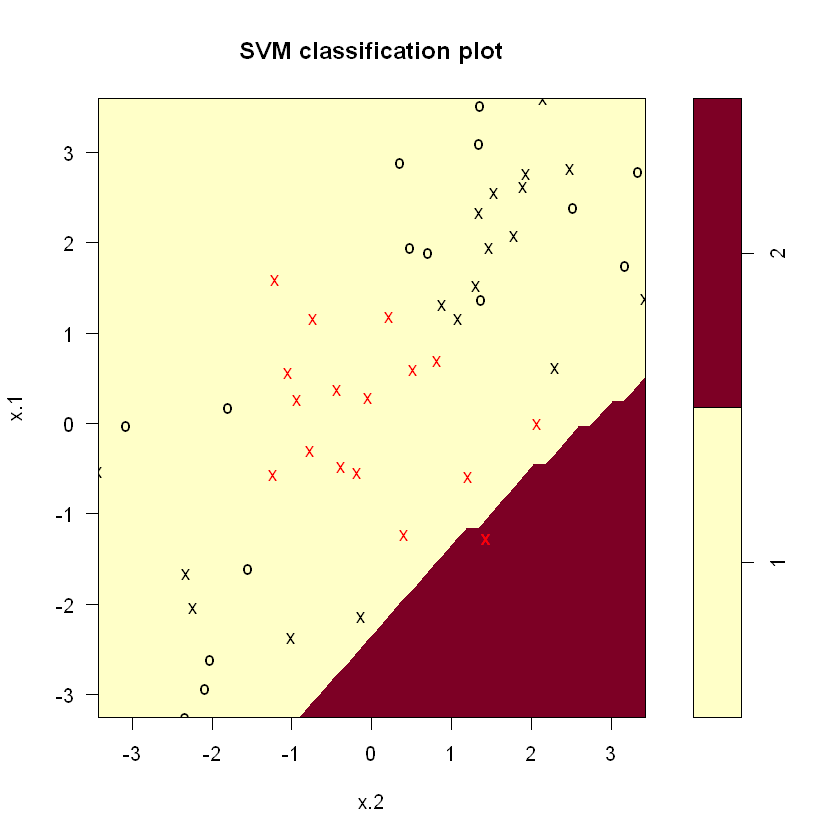

In [97]:
svmfit.pol=svm(y∼., data=dat[train,], kernel ="polynomial", gamma=1, cost=1)
plot(svmfit.pol , dat[train ,])

In [98]:
cm=table(predict = svmfit.pol$fitted, truth = dat[train,]$y)
cm

       truth
predict  1  2
      1 33 16
      2  0  1

In [99]:
errortrain.pol=class_error(cm)
errortrain.pol

[1] 0.32

In [100]:
pol.pred = predict(svmfit.pol, dat[-train,])
cm=table(predict = pol.pred, truth = dat[-train,]$y)
cm

       truth
predict  1  2
      1 42  8
      2  0  0

In [101]:
errortest.lin=class_error(cm)
errortest.lin

[1] 0.16

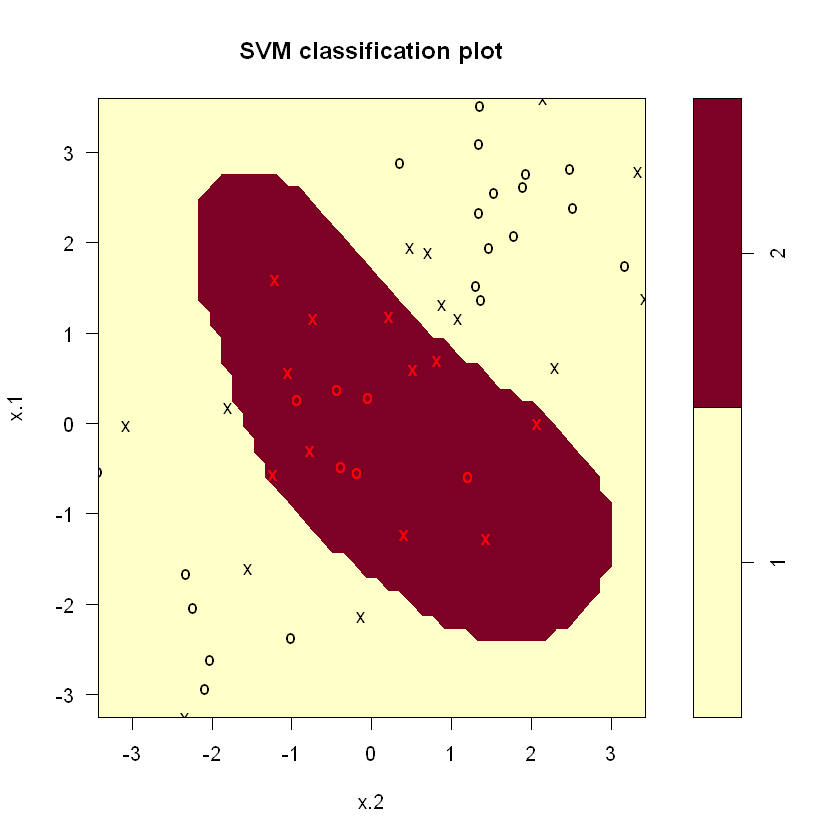

In [102]:
svmfit.rad=svm(y∼., data=dat[train ,], kernel ="radial", gamma=1, cost=1)
plot(svmfit.rad, dat[train ,])

In [103]:
cm=table(predict = svmfit.rad$fitted, truth = dat[train,]$y)
cm

       truth
predict  1  2
      1 33  0
      2  0 17

In [104]:
errortrain.rad=class_error(cm)
errortrain.rad

[1] 0

In [105]:
rad.pred = predict(svmfit.rad, dat[-train,])
cm=table(predict = rad.pred, truth = dat[-train,]$y)
cm

       truth
predict  1  2
      1 37  2
      2  5  6

In [106]:
errortest.rad=class_error(cm)
errortest.rad

[1] 0.14

The smallest errors are for radial kernel. 

## Problem 5

(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary
between them. 

In [107]:
x1=runif (500) -0.5
x2=runif (500) -0.5
y=1*(x1^2-x2^2 > 0)
df=data.frame(x1, x2, y=as.factor(y))

(b) Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the yaxis.

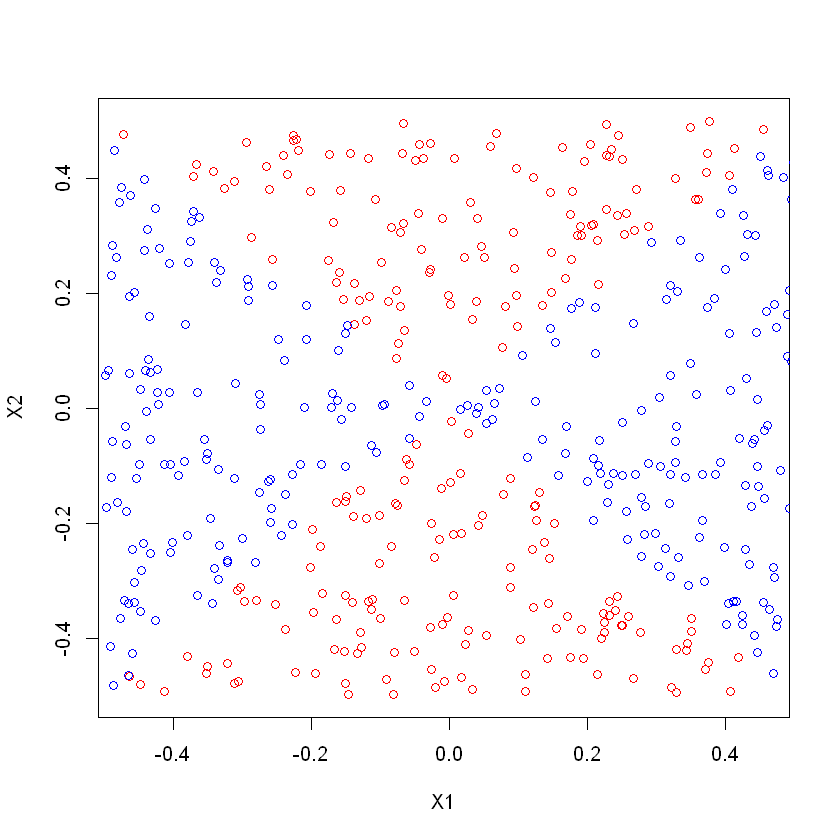

In [108]:
plot(x1[y == 0], x2[y == 0], col = "red", xlab = "X1", ylab = "X2")
points(x1[y == 1], x2[y == 1], col = "blue")

(c) Fit a logistic regression model to the data, using X1 and X2 as
predictors.

In [109]:
set.seed(1)
train=sample(1:500, 350)
df_tr = df[train,]
glm.fit = glm(y~., data = df, family=binomial)

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be linear

In [110]:
pred=predict(glm.fit, df, type="response")
y_pred=predictions(pred, df$y, 0, 1, 500)
cm=table(y_pred, df$y)
cm

      
y_pred   0   1
     0  66  74
     1 179 181

In [111]:
class_error(cm)

[1] 0.506

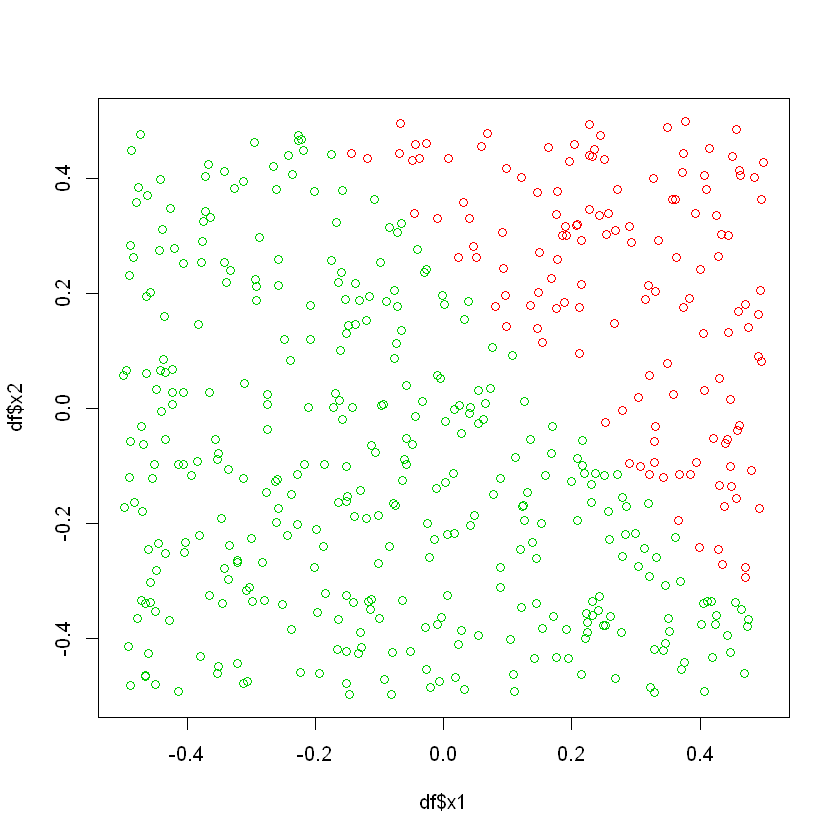

In [112]:
plot(df$x1, df$x2, col=y_pred+2)

(e) Now ﬁt a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. $X_1^2$ , X1×X2, log(X2), and so forth)

In [113]:
set.seed(2)
glm.fit = glm(y~poly(x1,2)+x2, data = df_tr, family=binomial)

In [114]:
pred=predict(glm.fit, df_tr, type="response")
y_pred=predictions(pred, df_tr$y, 0, 1, 350)
cm=table(y_pred, df_tr$y)
cm

      
y_pred   0   1
     0 146  54
     1  31 119

In [115]:
class_error(cm)

[1] 0.2428571

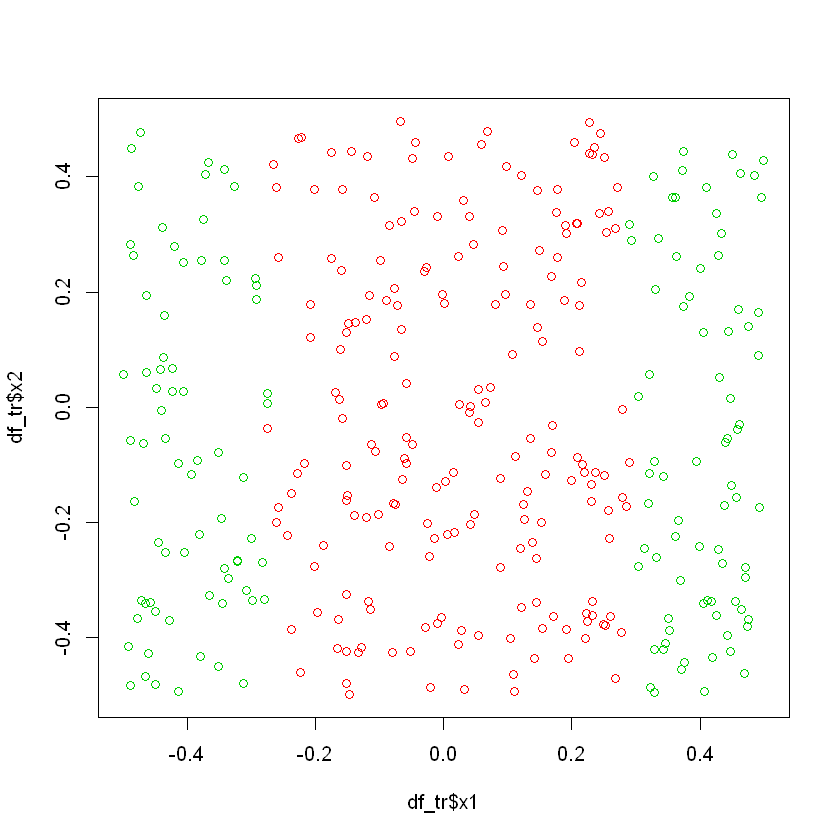

In [116]:
plot(df_tr$x1, df_tr$x2, col=y_pred+2)

In [117]:
set.seed(1)
glm.fit = glm(y~x1+x2+x2*x1, data = df_tr, family=binomial)

In [118]:
pred=predict(glm.fit, df, type="response")
y_pred=predictions(pred, df$y, 0, 1, 350)
cm=table(y_pred, df$y)
cm

      
y_pred   0   1
     0  98 137
     1 112  57

In [119]:
class_error(cm)

[1] 0.6163366

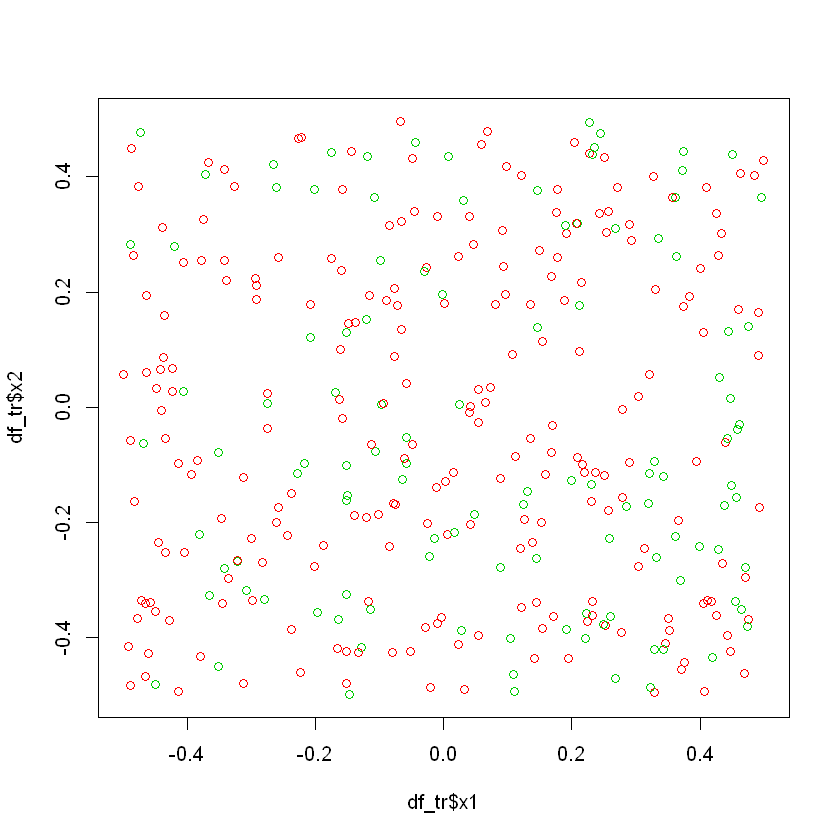

In [120]:
plot(df_tr$x1, df_tr$x2, col=y_pred+2)

(g) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [121]:
df=data.frame(x=cbind(x1, x2), y=as.factor(y))

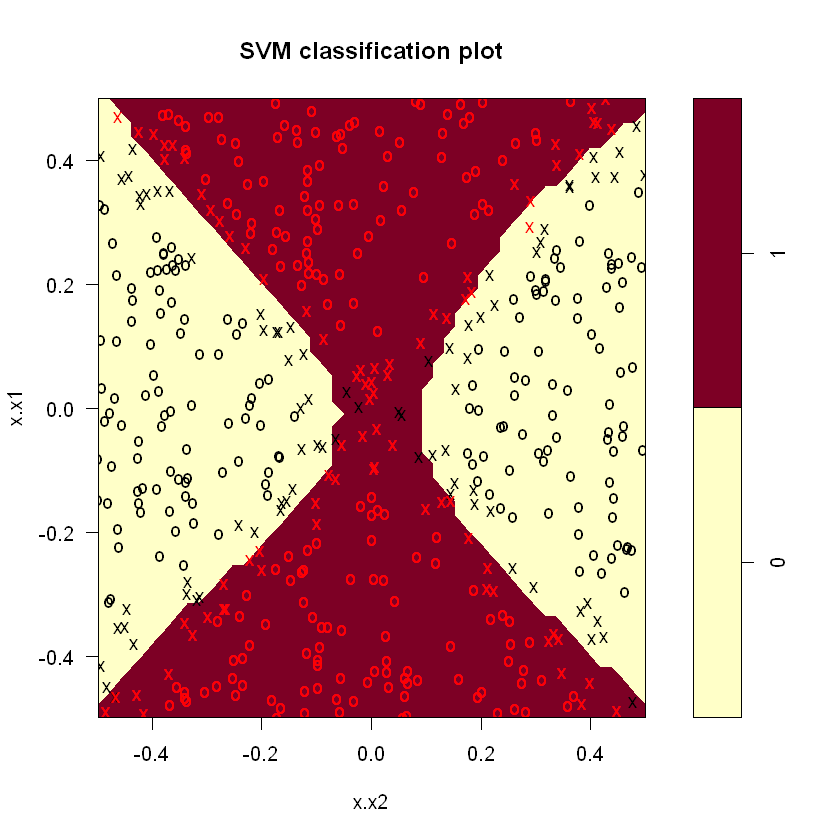

In [122]:
svm.fit = svm(y ~ ., data=df, kernel = 'radial', gamma = 1)
plot(svm.fit, data = df)

In [123]:
svm.pred = predict(svm.fit, data=df)
cm=table(predict = svm.fit$fitted, truth = df$y)
cm

       truth
predict   0   1
      0 229   1
      1  16 254

In [124]:
class_error(cm)

[1] 0.034

SVM error is very small, generated plane divides classes very well.

## Problem 6

At the end of Section 9.6.1, it is claimed that in the case of data that
is just barely linearly separable, a support vector classifier with a
small value of cost that misclassifies a couple of training observations
may perform better on test data than one with a huge value of cost
that does not misclassify any training observations. You will now
investigate this claim.

(a) Generate two-class data with p = 2 in such a way that the classes
are just barely linearly separable

In [125]:
x1=runif (500) -0.5
x2=runif (500) -0.5
y=(x1+0.9*x1^2-x2-1.2*x2^2 > 0)
df=data.frame(x1, x2, y=as.factor(y))

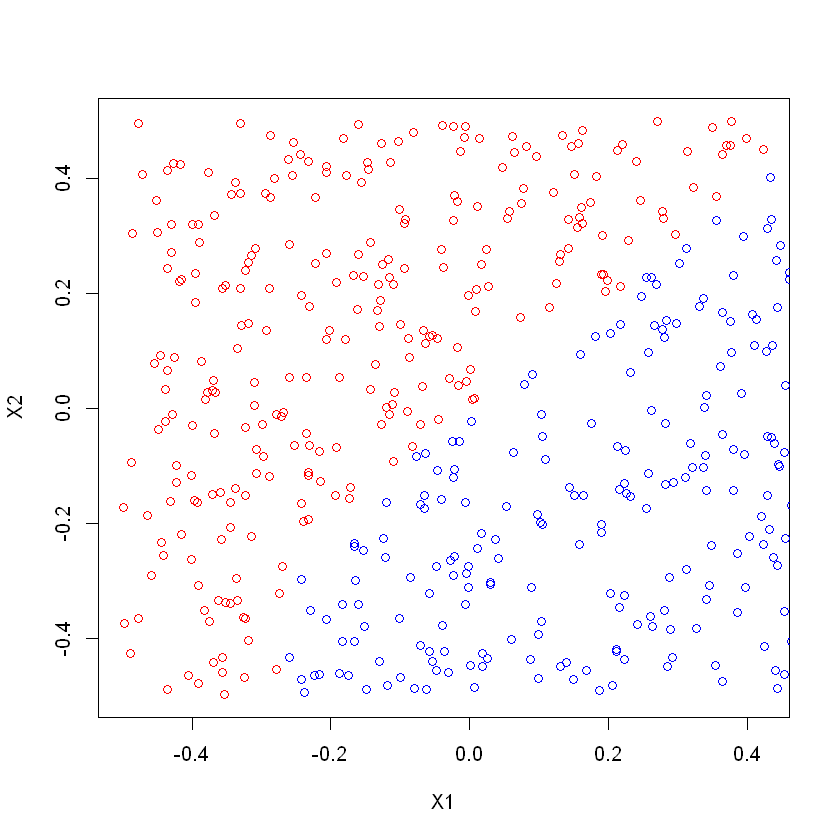

In [126]:
plot(x1[y == 0], x2[y == 0], col = "red", xlab = "X1", ylab = "X2")
points(x1[y == 1], x2[y == 1], col = "blue")

(b) Compute the cross-validation error rates for support vector
classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how
does this relate to the cross-validation errors obtained?

In [127]:
set.seed(1)
tune.out=tune(svm ,y∼.,data=df ,kernel ="linear",
ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100) ))
summary (tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.03 

- Detailed performance results:
   cost error dispersion
1 1e-03 0.442 0.09016035
2 1e-02 0.046 0.02674987
3 1e-01 0.036 0.02065591
4 1e+00 0.030 0.01943651
5 5e+00 0.034 0.01897367
6 1e+01 0.032 0.01932184
7 1e+02 0.036 0.01837873


In [128]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = df, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  74

 ( 37 37 )


Number of Classes:  2 

Levels: 
 FALSE TRUE




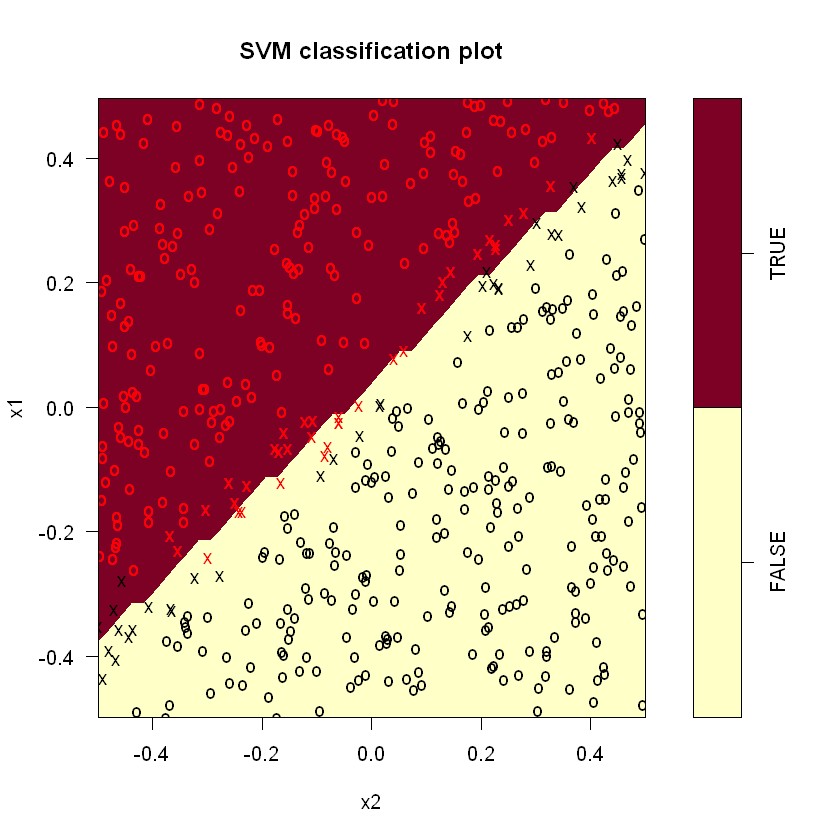

In [136]:
svm.fit = svm(y ~ ., data=df, kernel = 'linear', gamma = 1, cost=1)
plot(svm.fit, data = df)

(c) Generate an appropriate test data set, and compute the test
errors corresponding to each of the values of cost considered.
Which value of cost leads to the fewest test errors, and how
does this compare to the values of cost that yield the fewest
training errors and the fewest cross-validation errors?

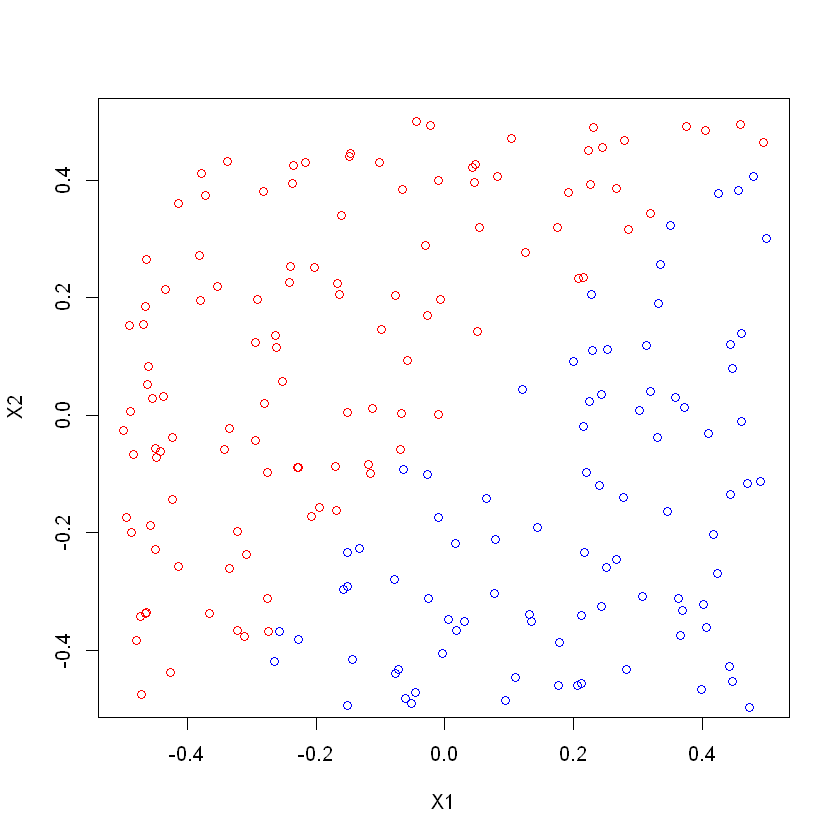

In [130]:
x1=runif (200) -0.5
x2=runif (200) -0.5
y=(x1+0.9*x1^2-x2-1.2*x2^2 > 0)
df_test=data.frame(x1, x2, y=as.factor(y))
plot(x1[y == 0], x2[y == 0], col = "red", xlab = "X1", ylab = "X2")
points(x1[y == 1], x2[y == 1], col = "blue")

In [137]:
summary(svm.fit)


Call:
svm(formula = y ~ ., data = df, kernel = "linear", gamma = 1, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  74

 ( 37 37 )


Number of Classes:  2 

Levels: 
 FALSE TRUE




In [131]:
svm.pred <- predict(svm.fit, data=df_test)
cm<-table(predict = svm.fit$fitted, truth = df$y)
cm
class_error(cm)

       truth
predict FALSE TRUE
  FALSE   267    8
  TRUE      7  218

[1] 0.03

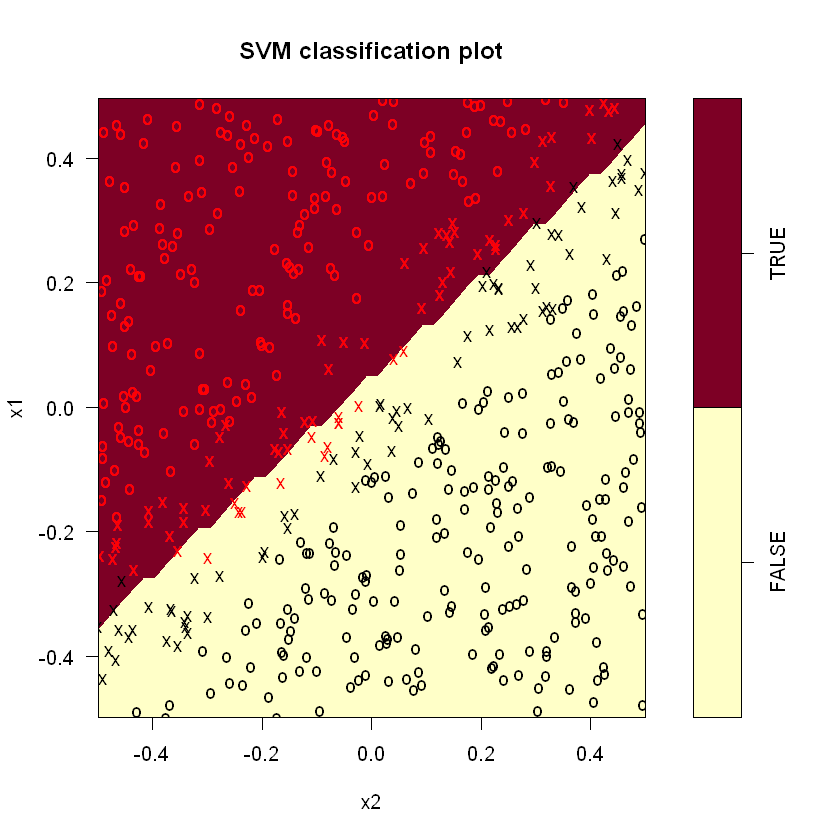

In [132]:
svm.fit = svm(y ~ ., data=df, kernel = 'linear', gamma = 1, cost=0.1)
plot(svm.fit, data = df)

In [135]:
summary(svm.fit)


Call:
svm(formula = y ~ ., data = df, kernel = "linear", gamma = 1, cost = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  141

 ( 71 70 )


Number of Classes:  2 

Levels: 
 FALSE TRUE




In [133]:
svm.pred = predict(svm.fit, data=df_test)
cm=table(predict = svm.fit$fitted, truth = df$y)
cm
class_error(cm)

       truth
predict FALSE TRUE
  FALSE   267   11
  TRUE      7  215

[1] 0.036

For cost = 0.1 4 more observations are missclassified. In case of cost =1 74 support vectors are used, in the case cost=0.1 141 suport vectors are used.

## Problem 7

7. In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

In [140]:
Auto <- read.csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Auto.csv", 
                 header = TRUE, na.strings = "?")
Auto <- na.omit(Auto)
dim(Auto)
head(Auto)

[1] 392   9

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


(a) Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median

In [149]:
med=median(Auto$mpg)
Auto$mpg01 = 0
Auto$mpg01[Auto$mpg>med]=1

(b) Fit a support vector classifier to the data with various values
of cost, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

In [153]:
set.seed(1)
tune.out=tune(svm, mpg01∼., data=Auto, kernel ="linear",
ranges=list(cost=c(0.001, 0.01, 0.1, 1, 5, 10, 100) ))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.07424404 

- Detailed performance results:
   cost      error dispersion
1 1e-03 0.09351655 0.02013225
2 1e-02 0.08379323 0.02362659
3 1e-01 0.07898470 0.02693908
4 1e+00 0.07424404 0.02693697
5 5e+00 0.08224114 0.03224958
6 1e+01 0.08874314 0.03324316
7 1e+02 0.11389623 0.03717388


Cost=1 model has the smallest error.

In [154]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = mpg01 ~ ., data = Auto, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.003205128 
    epsilon:  0.1 


Number of Support Vectors:  321






(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and
cost. Comment on your results

In [186]:
set.seed(1)
tune.out=tune(svm, mpg01∼.-mpg, data=Auto, kernel ="radial", 
ranges=list(cost=c(0.001, 0.01, 0.1, 1, 5, 10, 100, 1000) ))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  100

- best performance: 0.08176659 

- Detailed performance results:
   cost      error dispersion
1 1e-03 0.48949945 0.03899823
2 1e-02 0.41354389 0.03785750
3 1e-01 0.11467531 0.02497728
4 1e+00 0.09803436 0.02818832
5 5e+00 0.09302990 0.03267682
6 1e+01 0.09018825 0.03657183
7 1e+02 0.08176659 0.03645657
8 1e+03 0.08328059 0.03409625


In [161]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = mpg01 ~ ., data = Auto, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100, 1000)), kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.003205128 
    epsilon:  0.1 


Number of Support Vectors:  295






In [187]:
set.seed(1)
tune.out=tune(svm, mpg01∼.-mpg, data=Auto, kernel ="radial", cost=100,
ranges=list(degrees=c(0.5, 1, 2, 3, 4, 5) ))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 degrees
     0.5

- best performance: 0.08176659 

- Detailed performance results:
  degrees      error dispersion
1     0.5 0.08176659 0.03645657
2     1.0 0.08176659 0.03645657
3     2.0 0.08176659 0.03645657
4     3.0 0.08176659 0.03645657
5     4.0 0.08176659 0.03645657
6     5.0 0.08176659 0.03645657


It seems that degree does not influence.

In [188]:
set.seed(1)
tune.out=tune(svm, mpg01∼.-mpg, data=Auto, kernel ="radial", cost=100,
ranges=list(gamma=c(0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100) ))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma
  0.01

- best performance: 0.07622852 

- Detailed performance results:
  gamma      error  dispersion
1 1e-04 0.10365884 0.032837605
2 1e-03 0.09028450 0.038951748
3 1e-02 0.07622852 0.030784249
4 1e-01 0.08770589 0.033540507
5 1e+00 0.10442540 0.020692046
6 5e+00 0.23812027 0.007956301
7 1e+01 0.24380416 0.004607188
8 1e+02 0.25090196 0.001404230


In [189]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = mpg01 ~ . - mpg, data = Auto, ranges = list(gamma = c(1e-04, 
    0.001, 0.01, 0.1, 1, 5, 10, 100)), kernel = "radial", cost = 100)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  264






Best model is for cost 100 and gamma 0.1. Currently assumed that gamma does not affect lambda. 

In [202]:
svm.fit = svm(mpg01 ~.-mpg, data=Auto, kernel = 'radial', gamma = 0.1, cost=100)

In [227]:
#I can not see svm plots sometimes, which in the book are ok
plot(svm.fit, data=Auto, horsepower~weight)

## Problem 8

In [209]:
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


(a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.

In [228]:
set.seed(7)
train=sample(nrow(OJ), 800)
oj_train=OJ[train,]
oj_test=OJ[-train,]

(b) Fit a support vector classifier to the training data using
cost=0.01, with Purchase as the response and the other variables
as predictors. Use the summary() function to produce summary
statistics, and describe the results obtained.

In [236]:
svmfit=svm(Purchase~., oj_train, cost=0.01, kernel = "linear")
summary(svmfit)


Call:
svm(formula = Purchase ~ ., data = oj_train, cost = 0.01, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  438

 ( 218 220 )


Number of Classes:  2 

Levels: 
 CH MM




(c) What are the training and test error rates?

In [237]:
pred=predict(svmfit, oj_train)
cm=table(predict = pred, truth = oj_train$Purchase)
cm
class_error(cm)

       truth
predict  CH  MM
     CH 424  76
     MM  60 240

[1] 0.17

In [238]:
pred=predict(svmfit, oj_test)
cm=table(predict = pred, truth = oj_test$Purchase)
cm
class_error(cm)

       truth
predict  CH  MM
     CH 154  29
     MM  15  72

[1] 0.162963

(d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

In [239]:
set.seed(1)
tune.out=tune(svm, Purchase∼., data=oj_train, kernel="linear", ranges=list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10) ))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.175 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.17625 0.05219155
2  0.05 0.18125 0.05376453
3  0.10 0.18000 0.05407043
4  0.50 0.17750 0.05263871
5  1.00 0.17875 0.05497790
6  5.00 0.17500 0.05651942
7 10.00 0.17875 0.06096732


e) Compute the training and test error rates using this new value
for cost.

In [240]:
svmfit=svm(Purchase~., oj_train, cost=5, kernel='linear')
summary(svmfit)


Call:
svm(formula = Purchase ~ ., data = oj_train, cost = 5, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  5 

Number of Support Vectors:  332

 ( 167 165 )


Number of Classes:  2 

Levels: 
 CH MM




In [241]:
pred=predict(svmfit, oj_train)
cm=table(predict = pred, truth = oj_train$Purchase)
cm
class_error(cm)

       truth
predict  CH  MM
     CH 425  75
     MM  59 241

[1] 0.1675

In [243]:
pred=predict(svmfit, oj_test)
cm=table(predict = pred, truth = oj_test$Purchase)
cm
class_error(cm)

       truth
predict  CH  MM
     CH 154  29
     MM  15  72

[1] 0.162963

(f) Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma

In [245]:
svmradfit=svm(Purchase~., oj_train, cost=0.01, kernel = "radial")
summary(svmradfit)


Call:
svm(formula = Purchase ~ ., data = oj_train, cost = 0.01, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 

Number of Support Vectors:  636

 ( 320 316 )


Number of Classes:  2 

Levels: 
 CH MM




In [246]:
set.seed(1)
tune.out=tune(svm, Purchase∼., data=oj_train, kernel="radial", ranges=list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10) ))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.18125 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.39500 0.02220485
2  0.05 0.22750 0.03855011
3  0.10 0.19625 0.04931827
4  0.50 0.18500 0.04556741
5  1.00 0.18125 0.04723243
6  5.00 0.18500 0.04199868
7 10.00 0.18250 0.04647281


In [247]:
svmradfit=svm(Purchase~., oj_train, cost=1, kernel='radial')
summary(svmradfit)


Call:
svm(formula = Purchase ~ ., data = oj_train, cost = 1, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  381

 ( 194 187 )


Number of Classes:  2 

Levels: 
 CH MM




In [249]:
pred=predict(svmradfit, oj_train)
cm=table(predict = pred, truth = oj_train$Purchase)
cm
class_error(cm)

       truth
predict  CH  MM
     CH 433  75
     MM  51 241

[1] 0.1575

In [250]:
pred=predict(svmradfit, oj_test)
cm=table(predict = pred, truth = oj_test$Purchase)
cm
class_error(cm)

       truth
predict  CH  MM
     CH 158  29
     MM  11  72

[1] 0.1481481

(g) Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set degree=2.

In [254]:
svmpolfit=svm(Purchase~., oj_train, cost=0.01, degree =2, kernel = "polynomial")
summary(svmpolfit)


Call:
svm(formula = Purchase ~ ., data = oj_train, cost = 0.01, degree = 2, 
    kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  637

 ( 321 316 )


Number of Classes:  2 

Levels: 
 CH MM




In [255]:
set.seed(1)
tune.out=tune(svm, Purchase∼., data=oj_train, kernel="polynomial", degree=2, ranges=list(cost=c(0.01, 0.05, 0.1, 0.5, 1, 5, 10) ))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.195 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.39500 0.02220485
2  0.05 0.33500 0.03106892
3  0.10 0.32750 0.03162278
4  0.50 0.21375 0.03884174
5  1.00 0.20250 0.04440971
6  5.00 0.19500 0.05177408
7 10.00 0.19500 0.05342440


In [256]:
svmpolfit=svm(Purchase~., oj_train, cost=5, kernel='polynomial', degree=2)
summary(svmpolfit)


Call:
svm(formula = Purchase ~ ., data = oj_train, cost = 5, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  5 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  374

 ( 190 184 )


Number of Classes:  2 

Levels: 
 CH MM




In [257]:
pred=predict(svmpolfit, oj_train)
cm=table(predict = pred, truth = oj_train$Purchase)
cm
class_error(cm)

       truth
predict  CH  MM
     CH 441  88
     MM  43 228

[1] 0.16375

In [258]:
pred=predict(svmpolfit, oj_test)
cm=table(predict = pred, truth = oj_test$Purchase)
cm
class_error(cm)

       truth
predict  CH  MM
     CH 161  35
     MM   8  66

[1] 0.1592593

(h) Overall, which approach seems to give the best results on this
data?

model with radial kernel works best